In [22]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colorsYellow = ['#fec787', '#fb9d32']
colorsPurple = ['#d69bc5' ,'#a8509f']
colorsGreyOrange = ['#c3c3c3', '#f8a834']
colors = [colorsBlue, colorsRed, colorsYellow, colorsPurple, colorsGreyOrange]

In [23]:
from utils.modules import net

In [24]:
# with a set target frequency, the Nyquist rate is at least twice of it
# meaning the update time interval is at most period / 2

# define target function params
target_amplitde = 1.5
target_period = 25
target = lambda x: target_amplitde * np.sin(2 * np.pi * x / target_period)

# define network size - to make the simulations quicker 
N = 200

# define total training and testing time
t_train = 400
t_test = 200

# define training interval
DtGrid = np.logspace(-1, 2)

# how many copies to run?
Ncopy = 20

# initialise average loss array
# try both FORCE and fFORCE
MSE = np.zeros((len(DtGrid), Ncopy, 2))

In [25]:
# This cell runs the sweep over Δt and saves the results

# seed = 0
# for i, Dt in enumerate(DtGrid):
#     t0 = time.time()
#     for j in range(Ncopy):
#         seed += 1
#         for k in range(2):
#             # calculate forgetting parameter, normalised by Dt
#             gamma0 = 0.002
#             Dt0 = 0.1
#             gamma = k * (gamma0 / Dt0 * Dt)
#             
#             network = net(Δt = Dt, N = N, seed = seed)
#             res_train = network.simulate_train(t_train, target, γ = gamma)
#             res_test = network.simulate_test(t_train + t_test, target, t_ini = t_train)
#     
#             test_time = res_test[0]
#             test_output = res_test[4][:, 0]
#             ideal_output = target(test_time)
#             
#             MSE[i, j, k] = np.sqrt(np.mean((ideal_output - test_output) ** 2)) / target_amplitde
#     print(f'finished {i:03d}-th run in {time.time() - t0:.3f}s', end = '\r')

# with open('data/sweep_Dt.npy', 'wb') as f:
#     np.save(f, MSE)

In [26]:
with open('data/sweep_Dt.npy', 'rb') as f:
    MSE = np.load(f)

In [27]:
MSE_clipped = np.clip(MSE, 0, 5)
err_avg = np.mean(MSE_clipped, axis = 1)
err_std = np.std(MSE_clipped, axis = 1)

Text(0, 0.5, 'η')

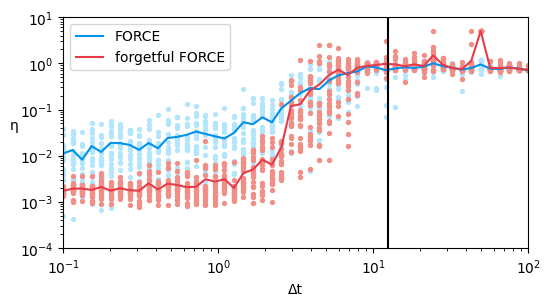

In [32]:
plt.figure(figsize = (6, 3))
for i in range(2):
    for j in range(Ncopy):    
        plt.scatter(DtGrid, MSE_clipped[:, j, i], color = colors[i][0], alpha = 1, s = 8)
    plt.plot(DtGrid, err_avg[:, i], color = colors[i][1], label = 'FORCE' if i == 0 else 'forgetful FORCE')
plt.axvline(target_period / 2, color = 'black')
plt.legend()
plt.xlim(1e-1, 1e2)
plt.ylim(1e-4, 1e1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Δt')
plt.ylabel('η', rotation = 0)